In [ ]:
import os
import string
import tempfile
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
from tensorflow.python.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorboard import summary as summary_lib


from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
tf.logging.set_verbosity(tf.logging.INFO)
print(tf.__version__)

1.14.0-rc1


In [ ]:
import io
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')

df=pd.read_csv('./gdrive/My Drive/Colab/Data/poly_nuc.csv')
df.head(5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Transcript  ...                                           sequence
0  MSTRG.11448.14  ...  TTTAAAACCCAATTTTTGTTCTCAACTTGAAAAGGGAACACTTTTT...
1  MSTRG.11448.15  ...  TTTAAAACCCAATTTTTGTTCTCAACTTGAAAAGGGAACACTTTTT...
2    MSTRG.4613.1  ...  CAGCTAATCATTTCCAAAGGTTAGTATCTCCCTGCTGACCTCTTCT...
3    MSTRG.8499.1  ...  TGGGAGGATCACTTGAGGCCAGGAGTTCAAGGCAGCAGTGAGCTAT...
4   MSTRG.10696.1  ...  CTTCGGTTGAAATGATTGCATGTTTTTGTCCTTCATTCTTTTGAAA...

[5 rows x 8 columns]

# Poly A


In [ ]:
df.groupby('polya_status')['Transcript'].nunique()

polya_status
.     53084
A+    16112
A-     9318
Name: Transcript, dtype: int64

In [ ]:
df.groupby('polya_gm12878')['Transcript'].nunique()

polya_gm12878
.     75040
A+     2357
A-     1117
Name: Transcript, dtype: int64

In [ ]:
df.groupby('polya_k562')['Transcript'].nunique()

polya_k562
.     75318
A+     2301
A-      895
Name: Transcript, dtype: int64

In [ ]:
df.groupby(['polya_status', 'polya_gm12878', 'polya_k562']).size()

polya_status  polya_gm12878  polya_k562
.             .              .             51500
                             A+              582
                             A-              153
              A+             .               459
                             A+               91
              A-             .               280
                             A+                1
                             A-               18
A+            .              .             13428
                             A+              872
                             A-                2
              A+             .              1055
                             A+              751
              A-             .                 3
                             A-                1
A-            .              .              8002
                             A+                4
                             A-              497
              A+             .                 1
              A-             

In [ ]:
dic_1 = {'.': 2,
     'A+': 1,
     'A-': 0}

df = df[["Transcript",'sequence', 'polya_status',"polya_gm12878","polya_k562"]]


df.iloc[:,2:] = df.iloc[:,2:].applymap(dic_1.get)


df.head(5)

Transcript  ... polya_k562
0  MSTRG.11448.14  ...          2
1  MSTRG.11448.15  ...          2
2    MSTRG.4613.1  ...          2
3    MSTRG.8499.1  ...          2
4   MSTRG.10696.1  ...          2

[5 rows x 5 columns]

In [ ]:
df['status'] = None


#%%
df.loc[(df.polya_status==1) | ((df.polya_status!=0) & (df.polya_gm12878==1) & (df.polya_k562!=0)) | ((df.polya_status==1) & (df.polya_k562==1) & (df.polya_gm12878!=0)) , 'status'] = '1'
print(df.head(10))

#%%
df.loc[(df.polya_status==0) | ((df.polya_status!=1) & (df.polya_gm12878==0) & (df.polya_k562!=1)) | ((df.polya_status!=1) & (df.polya_k562==0) & (df.polya_gm12878!=1)) , 'status'] = '0'
print(df.head(10))

df = df[["Transcript",'sequence', 'status']]

        Transcript  ... status
0   MSTRG.11448.14  ...   None
1   MSTRG.11448.15  ...   None
2     MSTRG.4613.1  ...   None
3     MSTRG.8499.1  ...   None
4    MSTRG.10696.1  ...   None
5    MSTRG.2796.13  ...      1
6    MSTRG.11041.1  ...   None
7     MSTRG.1565.1  ...   None
8     MSTRG.5130.1  ...   None
9  ENST00000473868  ...   None

[10 rows x 6 columns]
        Transcript  ... status
0   MSTRG.11448.14  ...   None
1   MSTRG.11448.15  ...   None
2     MSTRG.4613.1  ...   None
3     MSTRG.8499.1  ...   None
4    MSTRG.10696.1  ...   None
5    MSTRG.2796.13  ...      1
6    MSTRG.11041.1  ...   None
7     MSTRG.1565.1  ...   None
8     MSTRG.5130.1  ...   None
9  ENST00000473868  ...   None

[10 rows x 6 columns]


In [ ]:
df = df.mask(df.eq('None')).dropna()

df.groupby('status')['Transcript'].nunique()

status
0     9769
1    16662
Name: Transcript, dtype: int64

In [ ]:
df = df[['sequence', 'status']]
#df = df.drop(df[df.polya_status >= 2].index)
#df = df[['sequence', 'polya_status']]

In [ ]:
df.shape

(26431, 2)

In [ ]:
df.groupby('status')['sequence'].nunique()

status
0     9769
1    16662
Name: sequence, dtype: int64

In [ ]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=3):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]
  
def getSeqChunks(sequence, n=1):
    return [sequence[i:i+n].lower() for i in range(0, len(sequence), n)]
  
df['words'] = df.apply(lambda x: getKmers(x['sequence']), axis=1)
#df['words'] = df.apply(lambda x: getSeqChunks(x['sequence']), axis=1)
df = df.drop('sequence', axis=1)
df.head(5)

status                                              words
5       1  [cca, cag, agc, gcc, ccc, ccg, cga, gag, agg, ...
17      1  [agg, ggg, ggg, ggg, ggt, gtc, tct, ctt, ttc, ...
18      1  [tcc, cct, ctg, tgc, gcc, cct, ctc, tcc, ccc, ...
25      1  [cct, ctg, tgg, gga, gag, aga, gat, atg, tgc, ...
26      1  [act, ctg, tgt, gtc, tct, ctg, tgc, gca, cat, ...

In [ ]:
#dividing data lables
df_texts = list(df['words'])
for item in range(len(df_texts)):
    df_texts[item] = ' '.join(df_texts[item])
y_h = df.iloc[:, 0].values
y_h = y_h.astype(int)

from keras.utils import to_categorical
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(y_h), 
                y_h)

#y_h = to_categorical(y_h)
class_dict = { 0 : class_weights[0], 1 : class_weights[1]}
print(class_dict)

{0: 1.352799672433207, 1: 0.7931520825831233}


Using TensorFlow backend.


In [ ]:
from sklearn.model_selection import train_test_split
#Tain / test
X_t, X_test, y_t, y_test = train_test_split(df_texts, y_h, test_size=0.2, random_state=42)
#Tain / validation
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,4)) # 3,6 good with 8gramm, 6 6, 7-7 0.8125
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_val  = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)
X_train

<16915x5440 sparse matrix of type '<class 'numpy.int64'>'
	with 26497828 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
#tf_transformer = TfidfTransformer(use_idf=True).fit(X_train)
X_train  = tf_transformer.transform(X_train)
X_test  = tf_transformer.transform(X_test)
X_val  = tf_transformer.transform(X_val)
X_train.shape

(16915, 5440)

In [ ]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(class_weight="balanced")
    
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_val, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_val, y_predicted):
    accuracy = accuracy_score(y_val, y_predicted)
    precision = precision_score(y_val, y_predicted, average='weighted')
    recall = recall_score(y_val, y_predicted, average='weighted')
    f1 = f1_score(y_val, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_val, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix

Predicted     0     1
Actual               
0          1225   381
1           749  1874
accuracy = 0.733 
precision = 0.751 
recall = 0.733 
f1 = 0.736


In [ ]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted     0     1
Actual               
0          1425   472
1           998  2392
accuracy = 0.722 
precision = 0.747 
recall = 0.722 
f1 = 0.727


### XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(verbosity=3, max_depth=4)#, n_estimators=1000)

In [ ]:
model.fit(X_train, y_train, eval_metric=['auc', 'error'], verbose=True, eval_set=[(X_val, y_val)], early_stopping_rounds=10)

[0]	validation_0-auc:0.774314	validation_0-error:0.281899
Multiple eval metrics have been passed: 'validation_0-error' will be used for early stopping.

Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-auc:0.785662	validation_0-error:0.267359
[2]	validation_0-auc:0.797007	validation_0-error:0.262018
[3]	validation_0-auc:0.797969	validation_0-error:0.259941
[4]	validation_0-auc:0.798921	validation_0-error:0.25816
[5]	validation_0-auc:0.800681	validation_0-error:0.25816
[6]	validation_0-auc:0.8014	validation_0-error:0.260831
[7]	validation_0-auc:0.802857	validation_0-error:0.254896
[8]	validation_0-auc:0.803902	validation_0-error:0.25638
[9]	validation_0-auc:0.804889	validation_0-error:0.259941
[10]	validation_0-auc:0.805729	validation_0-error:0.259347
[11]	validation_0-auc:0.806359	validation_0-error:0.254006
[12]	validation_0-auc:0.807744	validation_0-error:0.251039
[13]	validation_0-auc:0.808444	validation_0-error:0.254006
[14]	validation_0-auc:0.8097

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=3)

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)

print("Accuracy for model: %.2f" % (accuracy_score(y_test, pred) * 100))

Accuracy for model: 74.33


In [ ]:
#prediction and Classification Report
from sklearn.metrics import classification_report


print(str(classification_report(y_test, pred)))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62      1441
           1       0.78      0.83      0.80      2524

   micro avg       0.74      0.74      0.74      3965
   macro avg       0.72      0.71      0.71      3965
weighted avg       0.74      0.74      0.74      3965



### Lightgbm

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,4)) # 3,6 good with 8gramm, 6 6, 7-7 0.8125
vectorizer.fit(df_texts)
df_texts = vectorizer.transform(df_texts)

from sklearn.feature_extraction.text import TfidfTransformer
#tf_transformer = TfidfTransformer(use_idf=True).fit(df_texts)
tf_transformer = TfidfTransformer(use_idf=False).fit(df_texts)
df_texts  = tf_transformer.transform(df_texts)
df_texts = pd.DataFrame(df_texts.todense())


In [ ]:
print(df_texts.shape)
df_texts.head(5)

(26431, 5440)


0         1         2     3     ...  5436      5437  5438      5439
0  0.120686  0.040229  0.008046   0.0  ...   0.0  0.008046   0.0  0.024137
1  0.000000  0.000000  0.000000   0.0  ...   0.0  0.000000   0.0  0.000000
2  0.020549  0.005137  0.000000   0.0  ...   0.0  0.000000   0.0  0.000000
3  0.042865  0.000000  0.000000   0.0  ...   0.0  0.000000   0.0  0.000000
4  0.064876  0.016219  0.000000   0.0  ...   0.0  0.000000   0.0  0.000000

[5 rows x 5440 columns]

In [ ]:
df_texts = df_texts.assign(pred=y_h)
df_texts.head()

0         1         2    3    4  ...  5436      5437  5438      5439  pred
0  0.120686  0.040229  0.008046  0.0  0.0  ...   0.0  0.008046   0.0  0.024137     1
1  0.000000  0.000000  0.000000  0.0  0.0  ...   0.0  0.000000   0.0  0.000000     1
2  0.020549  0.005137  0.000000  0.0  0.0  ...   0.0  0.000000   0.0  0.000000     1
3  0.042865  0.000000  0.000000  0.0  0.0  ...   0.0  0.000000   0.0  0.000000     1
4  0.064876  0.016219  0.000000  0.0  0.0  ...   0.0  0.000000   0.0  0.000000     1

[5 rows x 5441 columns]

In [ ]:
df_texts.isnull().values.any()

False

In [ ]:
#df_texts.iloc[:,-1]
#df_texts.iloc[:,:-1]

In [ ]:
from sklearn.model_selection import train_test_split
#Tain / test
X_t, X_test, y_t, y_test = train_test_split(df_texts.iloc[:,:-1], df_texts.iloc[:,-1], test_size=0.2, random_state=42)
#Tain / validation
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [ ]:
import lightgbm as lgbm
# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.02,
    'num_leaves' : 76,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': ['binary_logloss', 'AUC']
}

# making lgbm datasets for train and valid
d_train = lgbm.Dataset(X_train, y_train)
d_valid = lgbm.Dataset(X_val, y_val)
    
# training with early stop
bst = lgbm.train(params, d_train, 5000, valid_sets=[d_valid], verbose_eval=20, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.809131	valid_0's binary_logloss: 0.593402
[40]	valid_0's auc: 0.812007	valid_0's binary_logloss: 0.556016
[60]	valid_0's auc: 0.814898	valid_0's binary_logloss: 0.533795
[80]	valid_0's auc: 0.818381	valid_0's binary_logloss: 0.519399
[100]	valid_0's auc: 0.820886	valid_0's binary_logloss: 0.510029
[120]	valid_0's auc: 0.823125	valid_0's binary_logloss: 0.503333
[140]	valid_0's auc: 0.825023	valid_0's binary_logloss: 0.498637
[160]	valid_0's auc: 0.826953	valid_0's binary_logloss: 0.494903
[180]	valid_0's auc: 0.828443	valid_0's binary_logloss: 0.492052
[200]	valid_0's auc: 0.829342	valid_0's binary_logloss: 0.490192
[220]	valid_0's auc: 0.830767	valid_0's binary_logloss: 0.487959
[240]	valid_0's auc: 0.832049	valid_0's binary_logloss: 0.486001
[260]	valid_0's auc: 0.8329	valid_0's binary_logloss: 0.484801
[280]	valid_0's auc: 0.833988	valid_0's binary_logloss: 0.483441
[300]	valid_0's auc: 0.83466	vali

Overall accuracy of Light GBM model: 0.7684887459807074


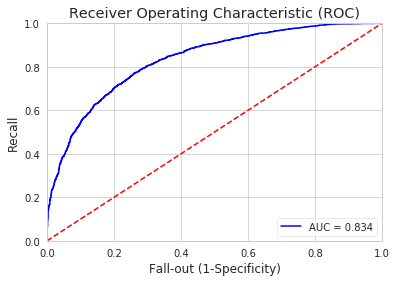

AUC score: 0.8340106490873763


<Figure size 432x288 with 0 Axes>

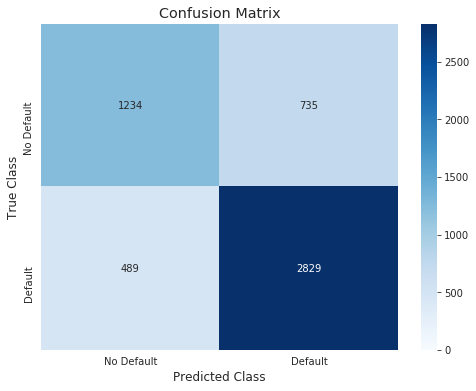

In [ ]:
predictions_lgbm_prob = bst.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import seaborn as sns
sns.set_style("whitegrid")

#Print accuracy
acc_lgbm = accuracy_score(y_test, predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
import pickle
import pandas as pd


from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

clf = lgb.LGBMRegressor()

param_grid ={'objective' :"binary",
             'n_estimators':sp_randint(3000, 15000),
             'num_leaves': sp_randint(100, 250), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'learning_rate':[0.001,0.01, 0.1, 0.2, 0.3]}

fit_params = {'eval_metric': 'rmse',
              'early_stopping_rounds': 30,
              'eval_set': [(X_valid, Y_valid)]}

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=10,
                            n_jobs=-1, verbose=2, cv=3,
                            fit_params=fit_params,
                            scoring='neg_mean_squared_error', refit=False, random_state=42)
print("Randomized search..")

rs_clf.fit(X_train, Y_train)


best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

### simple model

In [ ]:
from keras.regularizers import l1
from keras.regularizers import l2

#optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim,activation='relu',kernel_regularizer=l1(0.01), activity_regularizer=l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='relu', kernel_regularizer=l1(0.01))) #80
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 10)                54410     
_________________________________________________________________
batch_normalization_v1_80 (B (None, 10)                40        
_________________________________________________________________
dense_124 (Dense)            (None, 3)                 33        
_________________________________________________________________
batch_normalization_v1_81 (B (None, 3)                 12        
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 4         
Total params: 54,499
Trainable params: 54,473
Non-trainable params: 26
_________________________________________________________________


In [ ]:
from keras.regularizers import l1
from keras.regularizers import l2

#optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu',kernel_regularizer=l1(0.01), activity_regularizer=l1(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='relu', activity_regularizer=l1(0.01))) #80
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                     class_weight = class_dict,
                     epochs=100,
                     verbose=True,
                     validation_data=(X_val, y_val),
                     batch_size=128, callbacks=[checkpoint, eas])
plot_history(history)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
# model 3*(8:8)0.2

In [ ]:
from keras.callbacks import ModelCheckpoint
# Save the checkpoint in the /output folder
filepath = "./gdrive/My Drive/Colab/Data/polyA_balanced.hdf5"

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss',
                                             verbose=0, save_best_only=True, save_weights_only=True, mode='auto', period=1)

eas = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=50, verbose=0,
                              mode='auto', baseline=None, restore_best_weights=True)

Train on 16915 samples, validate on 4229 samples
Epoch 1/100
16915/16915 [==============================] - 4s 226us/sample - loss: 7.0020 - acc: 0.6271 - val_loss: 4.5638 - val_acc: 0.3798
Epoch 2/100
16915/16915 [==============================] - 1s 87us/sample - loss: 2.7885 - acc: 0.6824 - val_loss: 1.6512 - val_acc: 0.3798
Epoch 3/100
16915/16915 [==============================] - 1s 86us/sample - loss: 1.0573 - acc: 0.6945 - val_loss: 0.9792 - val_acc: 0.4777
Epoch 4/100
16915/16915 [==============================] - 1s 86us/sample - loss: 0.8016 - acc: 0.7022 - val_loss: 0.8577 - val_acc: 0.6448
Epoch 5/100
16915/16915 [==============================] - 1s 86us/sample - loss: 0.7456 - acc: 0.7050 - val_loss: 0.8038 - val_acc: 0.6607
Epoch 6/100
16915/16915 [==============================] - 1s 87us/sample - loss: 0.7182 - acc: 0.7103 - val_loss: 0.7710 - val_acc: 0.6690
Epoch 7/100
16915/16915 [==============================] - 1s 88us/sample - loss: 0.7010 - acc: 0.7159 - val_l

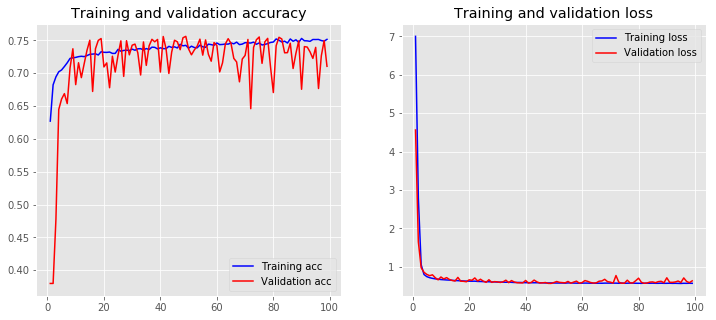

In [ ]:
history = model.fit(X_train, y_train,
                     class_weight = class_dict,
                     epochs=100,
                     verbose=True,
                     validation_data=(X_val, y_val),
                     batch_size=128, callbacks=[checkpoint, eas])
plot_history(history)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
# model 3*(8:8)0.2

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1


score = model.evaluate(X_test, y_test, verbose=3)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred = model.predict_classes(X_test)
pred = y_pred.reshape((-1))


act = y_test.reshape((-1, 1))
act = act.reshape((-1))
print(pd.crosstab(act, pred, rownames=['Real'], colnames=['Predicted'], margins=True))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Test loss: 0.5627446720725042
Test accuracy: 0.7599773
Predicted     0     1   All
Real                       
0          1261   708  1969
1           561  2757  3318
All        1822  3465  5287
accuracy = 0.760 
precision = 0.757 
recall = 0.760 
f1 = 0.758


In [ ]:
from sklearn import datasets
from sklearn.externals import joblib
# Saving the results
model.save('./gdrive/My Drive/Colab/Data/poly_a_7599.h5')
joblib.dump(vectorizer, './gdrive/My Drive/Colab/Data/vectorizer_poly_a.joblib')
joblib.dump(tf_transformer, './gdrive/My Drive/Colab/Data/transformer_poly_a.joblib')

['./gdrive/My Drive/Colab/Data/transformer_poly_a.joblib']